In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pylab as plt

In [23]:
import matplotlib as mpl
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False )

In [3]:
import warnings
warnings.filterwarnings("ignore")

## 주기성을 가지는 독립변수

In [10]:
data = sm.datasets.get_rdataset('elecdaily', package='fpp2')

df_elec = data.data.drop(columns = ['WorkDay', 'Temperature'])
df_elec['Date'] = pd.date_range('2014-1-1', '2014-12-31')
df_elec.tail()

,Demand,Date
360,173.727990,2014-12-27
361,188.512817,2014-12-28
362,191.273009,2014-12-29
363,186.240144,2014-12-30
364,186.370181,2014-12-31


In [11]:
import datetime as dt

df_elec['Ordinal'] = df_elec.Date.map(dt.datetime.toordinal)
df_elec['Timestamp'] = df_elec.Date.map(dt.datetime.timestamp)
df_elec.tail()

,Demand,Date,Ordinal,Timestamp
360,173.727990,2014-12-27,735594,1.419606e+09
361,188.512817,2014-12-28,735595,1.419692e+09
362,191.273009,2014-12-29,735596,1.419779e+09
363,186.240144,2014-12-30,735597,1.419865e+09
364,186.370181,2014-12-31,735598,1.419952e+09


In [13]:
model5 = sm.OLS.from_formula('Demand ~ scale(Ordinal)', data = df_elec )
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     11.58
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           0.000739
Time:                        11:29:12   Log-Likelihood:                -1709.7
No. Observations:                 365   AIC:                             3423.
Df Residuals:                     363   BIC:                             3431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        221.2775      1.374    160.

In [19]:
df_elec['Year'] = df_elec.Date.dt.year
df_elec['Month'] = df_elec.Date.dt.month
df_elec["DayOfYear"] = df_elec.Date.dt.dayofyear
df_elec["DayOfMonth"] = df_elec.Date.dt.daysinmonth
df_elec["DayOfWeek"] = df_elec.Date.dt.dayofweek
df_elec["WeekOfYear"] = df_elec.Date.dt.weekofyear
df_elec["Weekday"] = df_elec.Date.dt.weekday
df_elec["IsMonthStart"] = df_elec.Date.dt.is_month_start
df_elec["IsMonthEnd"] = df_elec.Date.dt.is_month_end
df_elec.tail()

,Demand,Date,Ordinal,Timestamp,Year,Month,DayOfYear,DayOfMonth,DayOfWeek,WeekOfYear,Weekday,IsMonthStart,IsMonthEnd
360,173.727990,2014-12-27,735594,1.419606e+09,2014,12,361,31,5,52,5,False,False
361,188.512817,2014-12-28,735595,1.419692e+09,2014,12,362,31,6,52,6,False,False
362,191.273009,2014-12-29,735596,1.419779e+09,2014,12,363,31,0,1,0,False,False
363,186.240144,2014-12-30,735597,1.419865e+09,2014,12,364,31,1,1,1,False,False
364,186.370181,2014-12-31,735598,1.419952e+09,2014,12,365,31,2,1,2,False,True


In [20]:
feature_names = df_elec.columns.tolist()
feature_names.remove('Demand')
feature_names.remove('Date')

formula = """
Demand ~ scale(Ordinal) +  C(Month) + DayOfYear + 
         C(DayOfMonth) + C(DayOfWeek) + C(Weekday) + C(IsMonthStart) + C(IsMonthEnd)
"""
model6 = sm.OLS.from_formula(formula, data=df_elec)
result6 = model6.fit()
print(result6.summary())


                            OLS Regression Results                            
Dep. Variable:                 Demand   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     19.98
Date:                Sat, 05 Feb 2022   Prob (F-statistic):           4.74e-46
Time:                        11:46:09   Log-Likelihood:                -1574.8
No. Observations:                 365   AIC:                             3192.
Df Residuals:                     344   BIC:                             3273.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [5]:
from sklearn.datasets import fetch_covtype

covtype = fetch_covtype()

feature_names = ["Aspect", "Hillshade_9am"]
df_covtype = pd.DataFrame(covtype.data[:, [1, 6]], columns=feature_names)
df_covtype = df_covtype.sample(10000, random_state=0)
# 편의상 10,000개 표본 추출
df_covtype.tail()

,Aspect,Hillshade_9am
77297,90.0,235.0
103214,38.0,220.0
459385,79.0,241.0
159359,58.0,225.0
565783,91.0,240.0


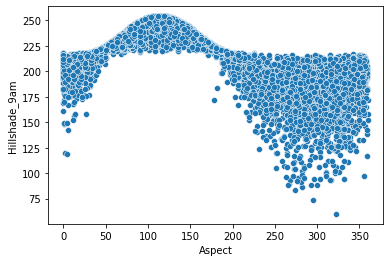

In [6]:
sns.scatterplot(x='Aspect', y='Hillshade_9am', data=df_covtype)
plt.show()

In [8]:
model7 = sm.OLS.from_formula(
    'Hillshade_9am ~ Aspect + I(Aspect**2) + I(Aspect**3)',
    data=df_covtype
)
result7 = model7.fit()
print(result7.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     7974.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:51:34   Log-Likelihood:                -40905.
No. Observations:               10000   AIC:                         8.182e+04
Df Residuals:                    9996   BIC:                         8.185e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        187.0395      0.485    385.

In [9]:
df_test = pd.DataFrame([[0], [30]], columns=['Aspect'])
df_result7 = result7.predict(df_test)
df_result7

0    187.039453
1    216.484744
dtype: float64

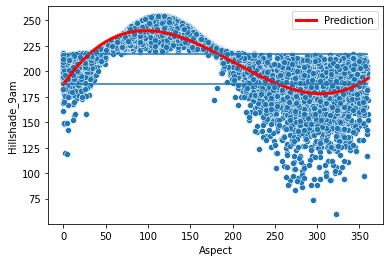

In [13]:
y_hat7 = result7.predict(df_covtype)
df7 = pd.concat([y_hat7, df_covtype.Aspect], axis=1).sort_values('Aspect')
df7.columns = ['Prediction', 'Aspect']
df7.plot(x='Aspect', style='r-', lw=3)
sns.scatterplot(x='Aspect', y='Hillshade_9am', data=df_covtype)
plt.hlines(df_result7.values[0], 0, 360)
plt.hlines(df_result7.values[1], 0, 360)
plt.show()

In [14]:
f = 2.0 * np.pi / 360

model8 = sm.OLS.from_formula('''
Hillshade_9am ~
np.cos(f*Aspect) +
np.sin(f*Aspect)
''', data=df_covtype
)
result8 = model8.fit()
print(result8.summary())

                            OLS Regression Results                            
Dep. Variable:          Hillshade_9am   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 1.334e+04
Date:                Sat, 05 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:07:35   Log-Likelihood:                -40515.
No. Observations:               10000   AIC:                         8.104e+04
Df Residuals:                    9997   BIC:                         8.106e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            208.8444      0

In [15]:
df_result8 = result8.predict(df_test)
df_result8

0    196.069868
1    213.067864
dtype: float64

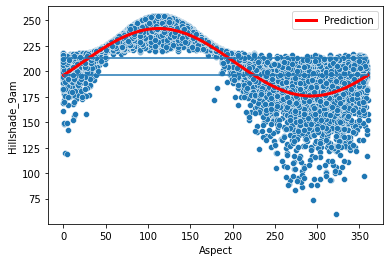

In [18]:
y_hat8 = result8.predict(df_covtype)
df8 = pd.concat([y_hat8, df_covtype.Aspect], axis=1).sort_values("Aspect")
df8.columns = ["Prediction", "Aspect"]
df8.plot(x="Aspect", style="r-", lw=3)
sns.scatterplot(x="Aspect", y="Hillshade_9am", data=df_covtype)
plt.hlines(df_result8.values[0], 0, 360)
plt.hlines(df_result8.values[1], 0, 360)
plt.show()


## 종속변수 변형

In [21]:
from sklearn.datasets import load_boston

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df_boston = pd.concat([dfX, dfy], axis=1)
model1 = sm.OLS.from_formula("MEDV ~ LSTAT", data=df_boston)
result1 = model1.fit()
y_hat1 = result1.predict(df_boston)

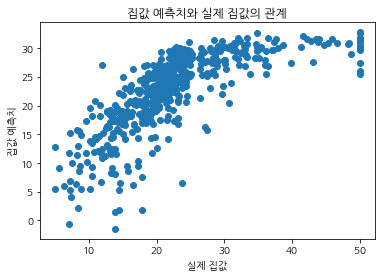

In [24]:
plt.scatter(boston.target, y_hat1)
plt.xlabel(u'실제 집값')
plt.ylabel(u'집값 예측치')
plt.title('집값 예측치와 실제 집값의 관계')
plt.show()           

In [26]:
model11 = sm.OLS.from_formula('np.sqrt(MEDV) ~ LSTAT', data=df_boston)
result11 = model11.fit()
print(result11.summary())

                            OLS Regression Results                            
Dep. Variable:          np.sqrt(MEDV)   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     789.7
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          3.09e-105
Time:                        21:04:29   Log-Likelihood:                -445.65
No. Observations:                 506   AIC:                             895.3
Df Residuals:                     504   BIC:                             903.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9499      0.053    112.374      0.0

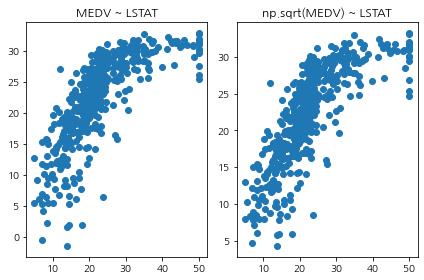

In [27]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title('MEDV ~ LSTAT')
plt.subplot(122)
plt.scatter(boston.target, (result11.predict(df_boston))**2)
plt.title('np.sqrt(MEDV) ~ LSTAT')
plt.tight_layout()
plt.show()

In [28]:
model12 = sm.OLS.from_formula('np.log(MEDV) ~ LSTAT', data=df_boston)
result12 = model12.fit()
print(result12.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.648
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     928.1
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          2.23e-116
Time:                        21:10:12   Log-Likelihood:               -0.57634
No. Observations:                 506   AIC:                             5.153
Df Residuals:                     504   BIC:                             13.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6176      0.022    164.654      0.0

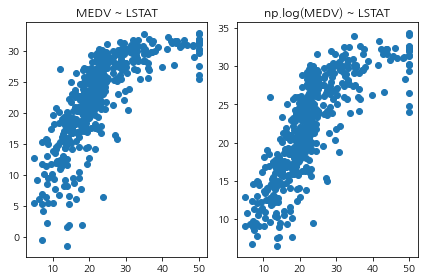

In [29]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title('MEDV ~ LSTAT')
plt.subplot(122)
plt.scatter(boston.target, np.exp(result12.predict(df_boston)))
plt.title('np.log(MEDV) ~ LSTAT')
plt.tight_layout()
plt.show()

In [31]:
model13 = sm.OLS.from_formula('np.log(MEDV) ~ np.log(LSTAT)', data=df_boston)
result13 = model13.fit()
print(result13.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     1058.
Date:                Sat, 05 Feb 2022   Prob (F-statistic):          7.32e-126
Time:                        21:16:04   Log-Likelihood:                 21.325
No. Observations:                 506   AIC:                            -38.65
Df Residuals:                     504   BIC:                            -30.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         4.3618      0.042    103.603

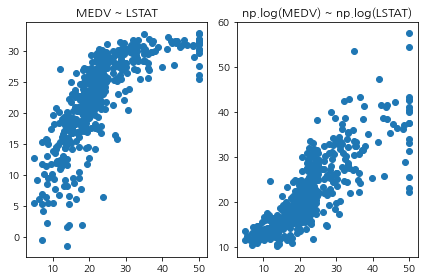

In [35]:
plt.subplot(121)
plt.scatter(boston.target, y_hat1)
plt.title('MEDV ~ LSTAT')
plt.subplot(122)
plt.scatter(boston.target, np.exp(result13.predict(df_boston)))
plt.title('np.log(MEDV) ~ np.log(LSTAT)')
plt.tight_layout()
plt.show()